# The Battle of Neighborhoods : Part 1

## Part 1.1 : Problem and Background

## Background

Singapore is the place with many landscape, USS, Singapore flyer etc.  
But sometime traveller like myself have a problems with things to do in Singapore (SG for short).

Normally, when people travel to SG, they usually travel by MRT.  
  
So, the project is for backpacked travellers who travel with MRT.  
The ML will recommend which MRT station they should visit based on the preference they have at the moment.

  
**ML model will receive travellers' current location and their preference.  
Then ML model will recommend which station they should visit.**

## Part 1.2 : Data and How it will be used

Using Data of Singapore's MRT location from Kaggle  
  from this link : https://www.kaggle.com/yxlee245/singapore-train-station-coordinates#mrt_lrt_data.csv  
   
Using Data of place around Singapore's MRT from Foursquare API  
 1. Name of the place
 2. Lat/Long of the place
 3. Type of the place
 3. Which MRT nearby
 
From all data, we could know clusters of places around each MRT station  
like the picture below ;  
  
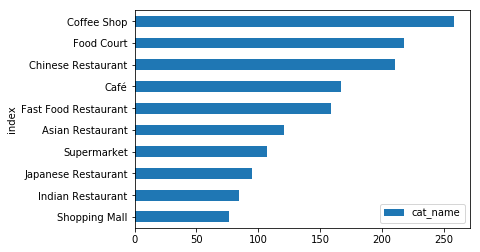
  
we should be able to recommend traveller from that information
  
The Data import method will be shown as below ;

In [1]:
import pandas as pd
import json, requests

### Load station's lat long

In [2]:
mrt_location = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets/287088/590207/mrt_lrt_data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1588937460&Signature=B75s9E01PhnGWNO73yUY8bDuYKr15gYSXobk9sfvCNDWMrqKXc1ZLxBK8Xn4DBcs1znG63oCGMedAFz9nnxo6MKjQDh6TXnRmF8VFFlNh2RFN5x3KqX5AfQAiWk9rnBK80p4Q9sFRzouYMDhN7iHKGtsn6oZAmtD66u8ceIwESss%2FmV0xp69EyLXtaTQC3mSlC4iPcC4Q%2FUq2AY59PSHrOUHWX3TpQyupPiwXdO63ONwjVUZH3KcTxVoKJbmyoNuz2%2FpSIbQ4A4JMvbPHouZF6Z%2BCx%2FNbaW%2BBHhiurq1zemczU6%2FZ8ILFIKdK46w%2FKHaroMLHyZE7YfO1uBCaBCShg%3D%3D&response-content-disposition=attachment%3B+filename%3Dmrt_lrt_data.csv')
mrt_location.head()

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523


In [3]:
mrt_location.shape

(157, 4)

In [4]:
mrt_location['latlng'] = mrt_location['lat'].astype('str')+','+mrt_location['lng'].astype('str')
mrt_location.head()

,station_name,type,lat,lng,latlng
0,Jurong East,MRT,1.333207,103.742308,"1.333207,103.742308"
1,Bukit Batok,MRT,1.349069,103.749596,"1.349069,103.749596"
2,Bukit Gombak,MRT,1.359043,103.751863,"1.359043,103.751863"
3,Choa Chu Kang,MRT,1.385417,103.744316,"1.385417,103.744316"
4,Yew Tee,MRT,1.397383,103.747523,"1.397383,103.747523"


### Make a function to collect foursquare API

In [5]:
def get_4square(latlong_in):
    url = 'https://api.foursquare.com/v2/venues/explore'
    params = dict(
    client_id='', #<< I remove
    client_secret='', #<< I remove
    v='20200101',
    ll=latlong_in,
    radius = 750#,
    #query='coffee',
    #limit=100
    )
    resp_in = requests.get(url=url, params=params)
    #data = json.loads(resp.text)
    df_before_loop = pd.DataFrame()
    for i_in_l in resp_in.json()['response']['groups'][0]['items'] :
        df_loop = pd.DataFrame({'name':[i_in_l['venue']['name']],
                      'lat' : [i_in_l['venue']['location']['lat']],
                      'lng' : [i_in_l['venue']['location']['lng']],
                      'cat_name' : [i_in_l['venue']['categories'][0]['name']],
                      'cat_pluralname':[i_in_l['venue']['categories'][0]['pluralName']],
                      'cat_shortname' : [i_in_l['venue']['categories'][0]['shortName']]})
        df_before_loop = df_before_loop.append(df_loop)
    return df_before_loop

### Loop to collect Data around every stations

In [6]:
df_sum = pd.DataFrame()
for i in mrt_location.index :
    print('Running',int(round(i/mrt_location.index.max(),2)*100),'%')
    df_1p = get_4square(mrt_location.loc[i,'latlng'])
    df_1p['station_name'] = mrt_location.loc[i,'station_name']
    df_1p['station_type'] = mrt_location.loc[i,'type']
    df_1p['station_lat'] = mrt_location.loc[i,'lat']
    df_1p['station_lng'] = mrt_location.loc[i,'lng']
    df_sum = df_sum.append(df_1p)

Running 0 %
Running 1 %
Running 1 %
Running 2 %
Running 3 %
Running 3 %
Running 4 %
Running 4 %
Running 5 %
Running 6 %
Running 6 %
Running 7 %
Running 8 %
Running 8 %
Running 9 %
Running 10 %
Running 10 %
Running 11 %
Running 12 %
Running 12 %
Running 13 %
Running 13 %
Running 14 %
Running 15 %
Running 15 %
Running 16 %
Running 17 %
Running 17 %
Running 18 %
Running 19 %
Running 19 %
Running 20 %
Running 21 %
Running 21 %
Running 22 %
Running 22 %
Running 23 %
Running 24 %
Running 24 %
Running 25 %
Running 26 %
Running 26 %
Running 27 %
Running 28 %
Running 28 %
Running 28 %
Running 28 %
Running 30 %
Running 31 %
Running 31 %
Running 32 %
Running 33 %
Running 33 %
Running 34 %
Running 35 %
Running 35 %
Running 36 %
Running 37 %
Running 37 %
Running 38 %
Running 38 %
Running 39 %
Running 40 %
Running 40 %
Running 41 %
Running 42 %
Running 42 %
Running 43 %
Running 44 %
Running 44 %
Running 45 %
Running 46 %
Running 46 %
Running 47 %
Running 47 %
Running 48 %
Running 49 %
Running 49 %
R

### Check dataframe

In [8]:
df_sum.shape

(4063, 10)

In [12]:
df_sum.head()

,name,lat,lng,cat_name,cat_pluralname,cat_shortname,station_name,station_type,station_lat,station_lng
0,UNIQLO,1.333175,103.743160,Clothing Store,Clothing Stores,Apparel,Jurong East,MRT,1.333207,103.742308
0,MUJI 無印良品,1.333187,103.743064,Furniture / Home Store,Furniture / Home Stores,Furniture / Home,Jurong East,MRT,1.333207,103.742308
0,Johan Paris,1.334083,103.742384,Bakery,Bakeries,Bakery,Jurong East,MRT,1.333207,103.742308
0,The Rink,1.333424,103.740345,Skating Rink,Skating Rinks,Skating Rink,Jurong East,MRT,1.333207,103.742308
0,Song Fa Bak Kut Teh 松發肉骨茶,1.333394,103.743420,Chinese Restaurant,Chinese Restaurants,Chinese,Jurong East,MRT,1.333207,103.742308


### Save for Local Use

In [13]:
df_sum.to_csv('Location_Data_SG.csv',index =False)